# <FGSM 적용하기></FGSM>

# **Dependacies**

In [58]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import os
import random

# **Importing Training Data**

In [59]:
ClassNames = ['Aircraft Carrier', 'Bulkers', 'Car Carrier', 'Container Ship', 'Cruise', 'DDG', 'Recreational', 'Sailboat', 'Submarine', 'Tug']

## 파일을 불러오는데 경로를 체크해야함

In [60]:
import os
print(os.getcwd())

c:\dev\workspace\Asia_Arrived_La\SON


### 위 코드를 사용하면 c:\dev\workspace\ai_sec\Asia_Arrived_La\SON 본인은 이렇게 나옴 각자 자신의 폴더 위치에 따라 다르겠지만
 
### c:\dev\workspace\ai_sec\Asia_Arrived_La\ 해당 부분을 아래 기본 경로 정의에 적어주면 된다. 자기의 폴더 구조에 따라 다를 것이다.

In [61]:
Base_Path = r'c:\dev\workspace\Asia_Arrived_La' ## --------> 해당 부분임

In [62]:
import os
import cv2
import numpy as np

# 기본 경로 정의
base_path = Base_Path  ## --------> 해당 부분임

# 기본 경로를 기준으로 이미지와 라벨 경로 정의
data_image = os.path.join(base_path, 'Data', 'Ships_dataset', 'train', 'images')
data_label = os.path.join(base_path, 'Data', 'Ships_dataset', 'train', 'labels')

# 절대 경로로 변환
pathi = os.path.abspath(data_image)
pathl = os.path.abspath(data_label)

# 경로를 확인하기 위해 출력
print("이미지 경로:", pathi)
print("라벨 경로:", pathl)

traindata = []


for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    traindata.append(image) 

이미지 경로: c:\dev\workspace\Asia_Arrived_La\Data\Ships_dataset\train\images
라벨 경로: c:\dev\workspace\Asia_Arrived_La\Data\Ships_dataset\train\labels


In [63]:
trainlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    trainlabel.append(a)

In [66]:
data = []
for i in range(0,len(trainlabel)):
    traindata[i] = traindata[i]/255
    data.append((traindata[i], trainlabel[i]))

random.shuffle(data)
images, labels =  [], []
for a, b in data:
    images.append(a)
    labels.append(b)
    


# **Visualize the Data**

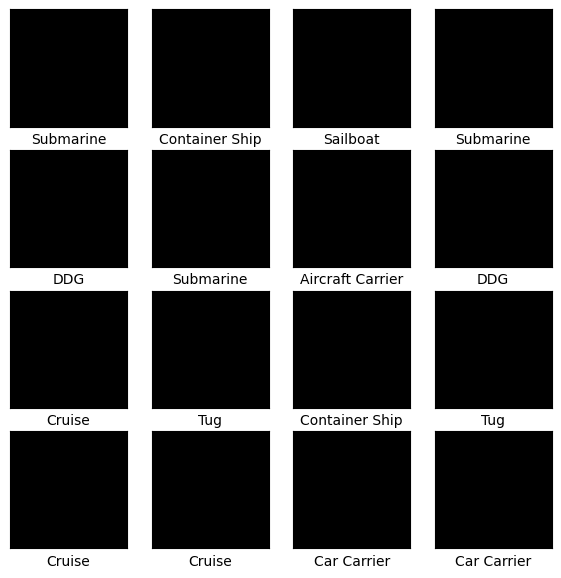

In [67]:
plt.figure(figsize=(7, 7))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(ClassNames[labels[i]])
plt.show()

# **Importing Validation Data**

In [68]:
import os
import cv2
import numpy as np

# 기본 경로 정의
base_path = Base_Path

# 기본 경로를 기준으로 이미지와 라벨 경로 정의
data_image = os.path.join(base_path, 'Data', 'Ships_dataset', 'valid', 'images')
data_label = os.path.join(base_path, 'Data', 'Ships_dataset', 'valid', 'labels')

# 절대 경로로 변환
pathi = os.path.abspath(data_image)
pathl = os.path.abspath(data_label)



# 경로를 확인하기 위해 출력
print("이미지 경로:", pathi)
print("라벨 경로:", pathl)


validdata = []


for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    validdata.append(image)
    
validlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    validlabel.append(a)
    
validation = []
for i in range(0,len(validlabel)):
    validdata[i] = validdata[i]/255
    validation.append((validdata[i], validlabel[i]))

random.shuffle(validation)
validationimages, validationlabels =  [], []
for a, b in validation:
    validationimages.append(a)
    validationlabels.append(b)

이미지 경로: c:\dev\workspace\Asia_Arrived_La\Data\Ships_dataset\valid\images
라벨 경로: c:\dev\workspace\Asia_Arrived_La\Data\Ships_dataset\valid\labels


In [69]:
images = np.array(images)
labels = np.array(labels)
validationimages = np.array(validationimages)
validationlabels = np.array(validationlabels)

# **Model**

In [70]:
# model = models.Sequential()
# model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(128,activation='relu'))
# model.add(layers.Dense(64,activation='relu'))
# model.add(layers.Dense(10,activation='softmax'))

# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# **Training the Model**

In [71]:
# model.fit(images,labels,batch_size = 32, epochs=20, validation_data=(validationimages,validationlabels))

# loss, accuracy = model.evaluate(images,labels)
# print(f"Loss: {loss}")
# print(f"Accuracy: {accuracy}")


# **Exporing the Model**

In [72]:
# model.save('ShipClassifierV1.h5')

# **Loading the model**

In [73]:
model = models.load_model('ShipClassifierV1.h5')

# **Importing testing Data**

In [74]:
import os
import cv2
import numpy as np

# 기본 경로 정의
base_path = Base_Path

# 기본 경로를 기준으로 이미지와 라벨 경로 정의
data_image = os.path.join(base_path, 'Data', 'Ships_dataset', 'test', 'images')
data_label = os.path.join(base_path, 'Data', 'Ships_dataset', 'test', 'labels')

# 절대 경로로 변환
pathi = os.path.abspath(data_image)
pathl = os.path.abspath(data_label)

# 경로를 확인하기 위해 출력
print("이미지 경로:", pathi)
print("라벨 경로:", pathl)


testdata = []


for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    testdata.append(image)
    
testlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    testlabel.append(a)
    
testing = []
for i in range(0,len(testlabel)):
    testdata[i] = testdata[i]/255
    testing.append((testdata[i], testlabel[i]))



random.shuffle(testing)
testingimages, testinglabels =  [], []
for a, b in testing:
    testingimages.append(a)
    testinglabels.append(b)
    
testinglabels = np.array(testinglabels)
testingimages = np.array(testingimages)

이미지 경로: c:\dev\workspace\Asia_Arrived_La\Data\Ships_dataset\test\images
라벨 경로: c:\dev\workspace\Asia_Arrived_La\Data\Ships_dataset\test\labels


In [75]:
testinglabels.dtype

dtype('int32')

In [76]:
testingimages.dtype

dtype('float64')

# **Testing the model**

In [ ]:
# loss, accuracy = model.evaluate(testingimages,testinglabels)
# print(f"Loss: {loss}")
# print(f"Accuracy: {accuracy}")

In [ ]:
# for i in range(4):
#     plt.subplot(2,2,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(testingimages[i],cmap=plt.cm.binary)
#     pred = model.predict(np.array([testingimages[i]]))
#     index = np.argmax(pred)
#     plt.xlabel(f"Actual = {ClassNames[testinglabels[i]]} \n Predicted = {ClassNames[index]}")
    
# plt.show()

## baseline model FGSM 공격 결과

In [77]:
# import the necessary packages
from tensorflow.keras.losses import MSE
import tensorflow as tf
import numpy as np



# 적대적 예제 생성 함수
def generate_image_adversary(model, image, label, eps=2 / 255.0):
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image)
        pred = model(image)
        loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        signedGrad = tf.sign(gradient)
        adversary = (image + (signedGrad * eps)).numpy()
        return adversary
        ## return 적대적 이미지 



# 원본 테스트 데이터에서 모델의 손실과 정확도 평가
loss, accuracy = model.evaluate(testingimages, testinglabels)
print(f"원본 테스트 데이터에서의 손실: {loss}")
print(f"원본 테스트 데이터에서의 정확도: {accuracy}")



# 적대적 예제를 저장할 리스트
adversarial_examples = []



# 테스트 이미지에 대해 적대적 예제 생성
for i in range(len(testingimages)):
    image = testingimages[i]
    label = testinglabels[i]
    adversary = generate_image_adversary(model, image.reshape(1, 64, 64, 3), label, eps=0.1)
    adversarial_examples.append(adversary)


# 적대적 예제를 numpy 배열로 변환
adversarial_examples = np.vstack(adversarial_examples)



# 적대적 예제를 사용하여 모델의 손실과 정확도 평가
adversarial_loss, adversarial_accuracy = model.evaluate(adversarial_examples, testinglabels)
print(f"적대적 테스트 데이터에서의 손실: {adversarial_loss}")
print(f"적대적 테스트 데이터에서의 정확도: {adversarial_accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8525 - loss: 1.0786
원본 테스트 데이터에서의 손실: 1.0981699228286743
원본 테스트 데이터에서의 정확도: 0.847769021987915
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.7798 - loss: 4.4630
적대적 테스트 데이터에서의 손실: 5.095647811889648
적대적 테스트 데이터에서의 정확도: 0.7690288424491882


## baseline model BIM 공격 결과

In [104]:
def generate_image_bim(model, image, label, eps = 2 / 255.0, alpha=0.1, iterations=10):
    image = tf.cast(image, tf.float32)
    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(image)
            pred = model(image)
            loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        signedGrad = tf.sign(gradient)
        image = image + alpha * signedGrad
      
    adversary = image.numpy()
    return adversary






# 원본 테스트 데이터에서 모델의 손실과 정확도 평가
loss, accuracy = model.evaluate(testingimages, testinglabels)
print(f"원본 테스트 데이터에서의 손실: {loss}")
print(f"원본 테스트 데이터에서의 정확도: {accuracy}")

# 적대적 예제를 저장할 리스트
bim_adversarial_examples = []


# 테스트 이미지에 대해 BIM 적대적 예제 생성
for i in range(len(testingimages)) :
    image = testingimages[i]
    label = testinglabels[i]
    bim_adversary = generate_image_bim(model, image.reshape(1, 64, 64, 3), label, eps=0.1, alpha=0.1, iterations=10)
    bim_adversarial_examples.append(bim_adversary)




# 적대적 예제를 numpy 배열로 변환
bim_adversarial_examples = np.vstack(bim_adversarial_examples)




# BIM 적대적 예제를 사용하여 모델의 손실과 정확도 평가
bim_loss, bim_accuracy = model.evaluate(bim_adversarial_examples, testinglabels)
print(f"BIM 적대적 테스트 데이터에서의 손실: {bim_loss}")
print(f"BIM 적대적 테스트 데이터에서의 정확도: {bim_accuracy}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8525 - loss: 1.0786
원본 테스트 데이터에서의 손실: 1.0981699228286743
원본 테스트 데이터에서의 정확도: 0.847769021987915


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.4293 - loss: 48.6022
BIM 적대적 테스트 데이터에서의 손실: 50.35498046875
BIM 적대적 테스트 데이터에서의 정확도: 0.4278215169906616


## baseline model PGD 공격 결과

In [96]:
def generate_image_pgd(model, image, label, eps=2 / 255.0, alpha=0.1, iterations=10):
    image = tf.cast(image, tf.float32)
    original_image = image
    perturbation = tf.random.uniform(image.shape, -eps, eps, dtype=tf.float32)
    image = image + perturbation
    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(image)
            pred = model(image)
            loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        signedGrad = tf.sign(gradient)
        image = image + alpha * signedGrad
        # 클리핑을 통해 이미지 값이 원래 범위를 넘지 않도록 보장
        image = tf.clip_by_value(image, original_image - eps, original_image + eps)
        image = tf.clip_by_value(image, 0, 1)  # 이미지 값이 0과 1 사이에 있도록 보장
    adversary = image.numpy()
    return adversary




# 원본 테스트 데이터에서 모델의 손실과 정확도 평가
loss, accuracy = model.evaluate(testingimages, testinglabels)
print(f"원본 테스트 데이터에서의 손실: {loss}")
print(f"원본 테스트 데이터에서의 정확도: {accuracy}")


pgd_adversarial_examples = []


# 테스트 이미지에 대해 PGD 적대적 예제 생성
for i in range(len(testingimages)):
    image = testingimages[i]
    label = testinglabels[i]
    pgd_adversary = generate_image_pgd(model, image.reshape(1, 64, 64, 3), label, eps=0.1, alpha=0.1, iterations=10)
    pgd_adversarial_examples.append(pgd_adversary)


pgd_adversarial_examples = np.vstack(pgd_adversarial_examples)


# PGD 적대적 예제를 사용하여 모델의 손실과 정확도 평가
pgd_loss, pgd_accuracy = model.evaluate(pgd_adversarial_examples, testinglabels)
print(f"PGD 적대적 테스트 데이터에서의 손실: {pgd_loss}")
print(f"PGD 적대적 테스트 데이터에서의 정확도: {pgd_accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8525 - loss: 1.0786
원본 테스트 데이터에서의 손실: 1.0981699228286743
원본 테스트 데이터에서의 정확도: 0.847769021987915
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6715 - loss: 8.5595
PGD 적대적 테스트 데이터에서의 손실: 9.197137832641602
PGD 적대적 테스트 데이터에서의 정확도: 0.6377952694892883


## baseline model DEEPFOOL 공격 결과

In [97]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import save_img

def deepfool(image, model, num_classes=10, overshoot=0.02, max_iter=10):
    image = tf.cast(image, tf.float32)
    image_label = tf.argmax(model(image), 1).numpy()[0]

    pert_image = image
    r_tot = tf.zeros_like(image)
    loop_i = 0
    x = tf.Variable(pert_image)
    w = tf.zeros_like(image)

    fs = model(x)
    k_i = image_label  # k_i 초기화

    while k_i == image_label and loop_i < max_iter:
        pert = np.inf
        with tf.GradientTape() as tape:
            tape.watch(x)
            fs = model(x)
            loss = fs[0][k_i]
        grad_orig = tape.gradient(loss, x)

        for k in range(num_classes):
            if k == k_i:
                continue
            
            with tf.GradientTape() as tape:
                tape.watch(x)
                fs = model(x)
                loss = fs[0][k]
            cur_grad = tape.gradient(loss, x)

            w_k = cur_grad - grad_orig
            f_k = (fs[0][k] - fs[0][k_i]).numpy()
            pert_k = abs(f_k) / tf.norm(tf.reshape(w_k, [-1]))
            
            if pert_k < pert:
                pert = pert_k
                w = w_k

        r_i = pert * tf.sign(w)
        r_tot = r_tot + r_i
        pert_image = image + (1 + overshoot) * r_tot
        x.assign(pert_image)

        loop_i += 1
        k_i = tf.argmax(model(x), 1).numpy()[0]

    # 적대적 이미지를 [0, 1] 범위로 클리핑
    clipped_adversarial_image = tf.clip_by_value(pert_image, clip_value_min=0, clip_value_max=1)
    return clipped_adversarial_image.numpy()

#



# 원본 테스트 데이터에서 모델의 손실과 정확도 평가
loss, accuracy = model.evaluate(testingimages, testinglabels)
print(f"원본 테스트 데이터에서의 손실: {loss}")
print(f"원본 테스트 데이터에서의 정확도: {accuracy}")


DEEPFOOL_adversarial_examples = []


# 테스트 이미지에 대해 deepfool 적대적 예제 생성
for i in range(len(testingimages)):
    image = testingimages[i]
    label = testinglabels[i]
    DEEPFOOL_adversary= deepfool(image.reshape(1, 64, 64, 3), model, num_classes=10, overshoot=0.02, max_iter=10)
    # DEEPFOOL_adversary = generate_image_pgd(model, image.reshape(1, 64, 64, 3), label, eps=0.1, alpha=0.01, iterations=10)
    DEEPFOOL_adversarial_examples.append(DEEPFOOL_adversary)


DEEPFOOL_adversarial_examples = np.vstack(DEEPFOOL_adversarial_examples)


# PGD 적대적 예제를 사용하여 모델의 손실과 정확도 평가
DEEPFOLSL, DEEPFOOL_accuracy = model.evaluate(DEEPFOOL_adversarial_examples, testinglabels)
print(f"PGD 적대적 테스트 데이터에서의 손실: {DEEPFOLSL}")
print(f"PGD 적대적 테스트 데이터에서의 정확도: {DEEPFOOL_accuracy}")




12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8525 - loss: 1.0786
원본 테스트 데이터에서의 손실: 1.0981699228286743
원본 테스트 데이터에서의 정확도: 0.847769021987915


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.1056 - loss: 21.2618
PGD 적대적 테스트 데이터에서의 손실: 20.58628273010254
PGD 적대적 테스트 데이터에서의 정확도: 0.12598425149917603


## train 이미지 생성

In [27]:
import os
import tensorflow as tf
from tensorflow.keras.losses import MSE
import numpy as np
from tensorflow.keras.preprocessing.image import save_img



# 적대적 예제 생성 함수
def generate_image_original(model, image, label, eps= 2 / 255.0, alpha=0 ):
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image)
        pred = model(image)
        loss = MSE(label, pred)
    gradient = tape.gradient(loss, image)
    signedGrad = tf.sign(gradient)
    image = image + alpha * signedGrad
      
    adversary = image.numpy()
    return adversary


# 저장 경로 설정
base_path = "./original_adversary_images"  # Modify with your actual path
image_save_path = os.path.join(base_path, 'images')
label_save_path = os.path.join(base_path, 'labels')
os.makedirs(image_save_path, exist_ok=True)  # Ensure the image directory exists
os.makedirs(label_save_path, exist_ok=True)  # Ensure the label directory exists

adversarial_examples = []
selected_labels = []




# 테스트 이미지에 대해 적대적 예제 생성 및 저장
for i in range(7400):  # Assuming you have at least 2000 images in your test set
    image = images[i]
    label = labels[i]
    adversary = generate_image_original(model, image.reshape(1, 64, 64, 3), label, eps=0, alpha=0)
    
    adversarial_examples.append(adversary)
    selected_labels.append(label)

    # 이미지 저장
    image_file_path = os.path.join(image_save_path, f'adversary_{i}.png')
    save_img(image_file_path, adversary[0])
    
    # 라벨 저장
    label_file_path = os.path.join(label_save_path, f'label_{i}.txt')
    with open(label_file_path, 'w') as label_file:
        label_file.write(str(label))



# 적대적 예제를 리스트에서 numpy 배열로 변환
adversarial_examples = np.vstack(adversarial_examples)
selected_labels = np.array(selected_labels)




# # 적대적 예제를 사용하여 모델의 손실과 정확도 평가
# adversarial_loss, adversarial_accuracy = model.evaluate(adversarial_examples, selected_labels)
# print(f"적대적 테스트 데이터에서의 손실: {adversarial_loss}")
# print(f"적대적 테스트 데이터에서의 정확도: {adversarial_accuracy}")


## fgsm으로 적대적 이미지 2000개 만들어서 저장

In [29]:
import os
import tensorflow as tf
from tensorflow.keras.losses import MSE
import numpy as np
from tensorflow.keras.preprocessing.image import save_img



# 적대적 예제 생성 함수
def generate_image_adversary(model, image, label, eps=2 / 255.0) :
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape :
        tape.watch(image)
        pred = model(image)
        loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        signedGrad = tf.sign(gradient)
        adversary = (image + (signedGrad * eps)).numpy()
        return adversary



# 저장 경로 설정
base_path = "./fgsm_adversary_images"  # Modify with your actual path
image_save_path = os.path.join(base_path, 'images')
label_save_path = os.path.join(base_path, 'labels')
os.makedirs(image_save_path, exist_ok=True)  # Ensure the image directory exists
os.makedirs(label_save_path, exist_ok=True)  # Ensure the label directory exists

adversarial_examples = []
selected_labels = []



# 테스트 이미지에 대해 적대적 예제 생성 및 저장
for i in range(2000) :  # Assuming you have at least 2000 images in your test set
    image = images[i]
    label = labels[i]
    adversary = generate_image_adversary(model, image.reshape(1, 64, 64, 3), label, eps=0.1)
    
    adversarial_examples.append(adversary)
    selected_labels.append(label)

    # 이미지 저장
    image_file_path = os.path.join(image_save_path, f'adversary_{i}.png')
    save_img(image_file_path, adversary[0])
    
    # 라벨 저장
    label_file_path = os.path.join(label_save_path, f'label_{i}.txt')
    with open(label_file_path, 'w') as label_file:
        label_file.write(str(label))



# # 적대적 예제를 리스트에서 numpy 배열로 변환
# adversarial_examples = np.vstack(adversarial_examples)
# selected_labels = np.array(selected_labels)




# # 적대적 예제를 사용하여 모델의 손실과 정확도 평가
# adversarial_loss, adversarial_accuracy = model.evaluate(adversarial_examples, selected_labels)
# print(f"적대적 테스트 데이터에서의 손실: {adversarial_loss}")
# print(f"적대적 테스트 데이터에서의 정확도: {adversarial_accuracy}")




## BIM 적대적 이미지 2000개 생성

In [30]:
import os
import tensorflow as tf
from tensorflow.keras.losses import MSE
import numpy as np
from tensorflow.keras.preprocessing.image import save_img



# 적대적 예제 생성 함수
def generate_image_bim(model, image, label, eps=2 / 255.0, alpha=0.01, iterations=10) :
    image = tf.cast(image, tf.float32)
    for i in range(iterations):
        with tf.GradientTape() as tape :
            tape.watch(image)
            pred = model(image)
            loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        signedGrad = tf.sign(gradient)
        image = image + alpha * signedGrad
      
    adversary = image.numpy()
    return adversary


# 저장 경로 설정
base_path = "./BIM_adversary_images"  # Modify with your actual path
image_save_path = os.path.join(base_path, 'images')
label_save_path = os.path.join(base_path, 'labels')
os.makedirs(image_save_path, exist_ok=True)  # Ensure the image directory exists
os.makedirs(label_save_path, exist_ok=True)  # Ensure the label directory exists

adversarial_examples = []
selected_labels = []




# 테스트 이미지에 대해 적대적 예제 생성 및 저장
for i in range(2000) :  # Assuming you have at least 2000 images in your test set
    image = images[i]
    label = labels[i]
    adversary = generate_image_bim(model, image.reshape(1, 64, 64, 3), label, eps=0.1, alpha=0.01, iterations=10)
    
    adversarial_examples.append(adversary)
    selected_labels.append(label)

    # 이미지 저장
    image_file_path = os.path.join(image_save_path, f'adversary_{i}.png')
    save_img(image_file_path, adversary[0])
    
    # 라벨 저장
    label_file_path = os.path.join(label_save_path, f'label_{i}.txt')
    with open(label_file_path, 'w') as label_file:
        label_file.write(str(label))



# # 적대적 예제를 리스트에서 numpy 배열로 변환
# adversarial_examples = np.vstack(adversarial_examples)
# selected_labels = np.array(selected_labels)




# # 적대적 예제를 사용하여 모델의 손실과 정확도 평가
# adversarial_loss, adversarial_accuracy = model.evaluate(adversarial_examples, selected_labels)
# print(f"적대적 테스트 데이터에서의 손실: {adversarial_loss}")
# print(f"적대적 테스트 데이터에서의 정확도: {adversarial_accuracy}")


##  PGD 적대적 이미지 생성

In [31]:
def generate_image_pgd(model, image, label, eps=2 / 255.0, alpha=0.01, iterations=10):
    image = tf.cast(image, tf.float32)
    original_image = image
    perturbation = tf.random.uniform(image.shape, -eps, eps, dtype=tf.float32)
    image = image + perturbation
    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(image)
            pred = model(image)
            loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        signedGrad = tf.sign(gradient)
        image = image + alpha * signedGrad
        # 클리핑을 통해 이미지 값이 원래 범위를 넘지 않도록 보장
        image = tf.clip_by_value(image, original_image - eps, original_image + eps)
        image = tf.clip_by_value(image, 0, 1)  # 이미지 값이 0과 1 사이에 있도록 보장
    adversary = image.numpy()
    return adversary



# 저장 경로 설정
base_path = "./PGD_adversary_images"  # Modify with your actual path
image_save_path = os.path.join(base_path, 'images')
label_save_path = os.path.join(base_path, 'labels')
os.makedirs(image_save_path, exist_ok=True)  # Ensure the image directory exists
os.makedirs(label_save_path, exist_ok=True)  # Ensure the label directory exists

adversarial_examples = []
selected_labels = []

# 테스트 이미지에 대해 적대적 예제 생성 및 저장
for i in range(2000):  # Assuming you have at least 2000 images in your test set
    image = images[i]
    label = labels[i]
    adversary = generate_image_pgd(model, image.reshape(1, 64, 64, 3), label, eps=0.1, alpha=0.01, iterations=10)
    
    adversarial_examples.append(adversary)
    selected_labels.append(label)

    # 이미지 저장
    image_file_path = os.path.join(image_save_path, f'adversary_{i}.png')
    save_img(image_file_path, adversary[0])
    
    # 라벨 저장
    label_file_path = os.path.join(label_save_path, f'label_{i}.txt')
    with open(label_file_path, 'w') as label_file :
        label_file.write(str(label))



# # 적대적 예제를 리스트에서 numpy 배열로 변환
# adversarial_examples = np.vstack(adversarial_examples)
# selected_labels = np.array(selected_labels)

# # 적대적 예제를 사용하여 모델의 손실과 정확도 평가
# adversarial_loss, adversarial_accuracy = model.evaluate(adversarial_examples, selected_labels)
# print(f"적대적 테스트 데이터에서의 손실: {adversarial_loss}")
# print(f"적대적 테스트 데이터에서의 정확도: {adversarial_accuracy}")

## Deepfool 적대적 이미지 생성

In [32]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import save_img

def deepfool(image, model, num_classes=10, overshoot=0.02, max_iter=10):
    image = tf.cast(image, tf.float32)
    image_label = tf.argmax(model(image), 1).numpy()[0]

    pert_image = image
    r_tot = tf.zeros_like(image)
    loop_i = 0
    x = tf.Variable(pert_image)
    w = tf.zeros_like(image)

    fs = model(x)
    k_i = image_label  # k_i 초기화

    while k_i == image_label and loop_i < max_iter:
        pert = np.inf
        with tf.GradientTape() as tape:
            tape.watch(x)
            fs = model(x)
            loss = fs[0][k_i]
        grad_orig = tape.gradient(loss, x)

        for k in range(num_classes):
            if k == k_i:
                continue
            
            with tf.GradientTape() as tape :
                tape.watch(x)
                fs = model(x)
                loss = fs[0][k]
            cur_grad = tape.gradient(loss, x)

            w_k = cur_grad - grad_orig
            f_k = (fs[0][k] - fs[0][k_i]).numpy()
            pert_k = abs(f_k) / tf.norm(tf.reshape(w_k, [-1]))
            
            if pert_k < pert :
                pert = pert_k
                w = w_k

        r_i = pert * tf.sign(w)
        r_tot = r_tot + r_i
        pert_image = image + (1 + overshoot) * r_tot
        x.assign(pert_image)

        loop_i += 1
        k_i = tf.argmax(model(x), 1).numpy()[0]

    # 적대적 이미지를 [0, 1] 범위로 클리핑
    clipped_adversarial_image = tf.clip_by_value(pert_image, clip_value_min=0, clip_value_max=1)
    return clipped_adversarial_image.numpy()

# 설정한 저장 경로
base_path = "./deepfool_adversary_images"
image_save_path = os.path.join(base_path, 'images')
label_save_path = os.path.join(base_path, 'labels')
os.makedirs(image_save_path, exist_ok=True)
os.makedirs(label_save_path, exist_ok=True)

adversarial_examples = []
selected_labels = []

# 테스트 이미지에 대해 적대적 예제 생성 및 저장
for i in range(min(2000, len(images))):  # 이미지 수가 2000개 이하일 수 있으므로 min 함수 사용
    image_tensor = tf.reshape(images[i], (1, 64, 64, 3))
    image_tensor = tf.cast(image_tensor, tf.float32)  # 데이터 타입을 float32로 조정
    label = labels[i]

    adversary = deepfool(image_tensor, model, num_classes=10, overshoot=0.02, max_iter=10)
    adversarial_examples.append(adversary)
    selected_labels.append(label)

    # 클리핑된 적대적 이미지 저장
    image_file_path = os.path.join(image_save_path, f'adversary_{i}.png')
    save_img(image_file_path, adversary[0])  # adversary[0]를 바로 저장하도록 설정

    label_file_path = os.path.join(label_save_path, f'label_{i}.txt')
    with open(label_file_path, 'w') as label_file:
        label_file.write(str(label))







# # 적대적 예제를 리스트에서 numpy 배열로 변환
# adversarial_examples = np.vstack(adversarial_examples)
# selected_labels = np.array(selected_labels)

# # 모델을 사용하여 적대적 예제의 손실과 정확도 평가
# adversarial_loss, adversarial_accuracy = model.evaluate(adversarial_examples, selected_labels)
# print(f"적대적 테스트 데이터에서의 손실: {adversarial_loss}")
# print(f"적대적 테스트 데이터에서의 정확도: {adversarial_accuracy}")


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\image_utils.py:99: RuntimeWarning: invalid value encountered in cast
  return pil_image.fromarray(x.astype("uint8"), "RGB")


## Test 이미지 생성

In [34]:
import os
import tensorflow as tf
from tensorflow.keras.losses import MSE
import numpy as np
from tensorflow.keras.preprocessing.image import save_img

# 적대적 예제 생성 함수
def generate_image_original(model, image, label, eps=2/255.0, alpha=0):
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image)
        pred = model(image)
        loss = MSE(tf.one_hot([label], depth=10), pred)  # 예를 들어, 클래스가 10개인 경우
    gradient = tape.gradient(loss, image)
    signed_grad = tf.sign(gradient)
    image = image + alpha * signed_grad
    adversary = image.numpy()
    return adversary



# 저장 경로 설정
base_path = "./test_original_adversary_images"  # 경로 수정 가능
image_save_path = os.path.join(base_path, 'images')
label_save_path = os.path.join(base_path, 'labels')
os.makedirs(image_save_path, exist_ok=True)
os.makedirs(label_save_path, exist_ok=True)

adversarial_examples = []
selected_labels = []

# 테스트 이미지와 레이블을 가정합니다. 예: testing_images, testing_labels
# for i in range(len(testing_images)):
for i in range(380):  # 테스트 세트의 이미지 수에 맞게 조정
    image = testingimages[i]
    label = testinglabels[i]  # 정수 레이블
    adversary = generate_image_original(model, image.reshape(1, 64, 64, 3), label, eps=0, alpha=0)
    
    adversarial_examples.append(adversary)
    selected_labels.append(label)

    # 이미지 저장
    image_file_path = os.path.join(image_save_path, f'adversary_{i}.png')
    save_img(image_file_path, adversary[0])

    # 레이블 저장
    label_file_path = os.path.join(label_save_path, f'label_{i}.txt')
    with open(label_file_path, 'w') as label_file:
        label_file.write(str(label))



# test 이미지를 변수명 변경하기
testingimages = adversarial_examples
testinglabels = selected_labels




# # 적대적 예제를 사용하여 모델의 손실과 정확도 평가
# adversarial_loss, adversarial_accuracy = model.evaluate(adversarial_examples, selected_labels)
# print(f"적대적 테스트 데이터에서의 손실: {adversarial_loss}")
# print(f"적대적 테스트 데이터에서의 정확도: {adversarial_accuracy}")


In [52]:
testingimages.dtype

dtype('float32')

In [53]:
testinglabels.dtype

dtype('float64')

## 데이터 결합 

In [35]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

def load_and_merge_datasets(base_paths, image_size=(64, 64), num_classes=None):
    all_images = []
    all_labels = []
    dataset_counts = {}  # 데이터 세트별 이미지 수를 추적하는 딕셔너리
    empty_label_count = 0  # 빈 label이 몇 개인지 카운트하는 변수
    empty_label_files = []  # 빈 label 파일 경로 저장 리스트

    for base_path in base_paths:
        image_save_path = os.path.join(base_path, 'images')
        label_save_path = os.path.join(base_path, 'labels')
        
        image_files = sorted([os.path.join(image_save_path, f) for f in os.listdir(image_save_path) if f.endswith('.png')])
        label_files = sorted([os.path.join(label_save_path, f) for f in os.listdir(label_save_path) if f.endswith('.txt')])
        
        dataset_counts[base_path] = len(image_files)  # 현재 데이터 세트의 이미지 수 카운트

        for img_file, lbl_file in zip(image_files, label_files):
            img = load_img(img_file, target_size=image_size)
            img = img_to_array(img)
            img /= 255.0

            with open(lbl_file, 'r') as file:
                label = file.read().strip()

                # 레이블이 빈 경우 체크
                if not label:
                    empty_label_count += 1
                    empty_label_files.append(lbl_file)
                    continue  # 빈 레이블인 경우 해당 항목 건너뜀

                if label.startswith('['):
                    label = np.fromstring(label[1:-1], sep=' ')
                    if len(label) == 0:  # label이 빈 배열인지 확인
                        empty_label_count += 1
                        empty_label_files.append(lbl_file)
                        continue  # 빈 레이블인 경우 해당 항목 건너뜀
                    if len(label.shape) == 1 and num_classes is not None:
                        label = to_categorical(int(label[0]), num_classes=num_classes)
                else:
                    try:
                        label = int(label)
                        if num_classes is not None:
                            label = to_categorical(label, num_classes=num_classes)
                    except ValueError:
                        empty_label_count += 1
                        empty_label_files.append(lbl_file)
                        continue  # 레이블이 int로 변환되지 않으면 건너뜀

            all_images.append(img)
            all_labels.append(label)

    all_images = np.array(all_images)
    all_labels = np.array(all_labels)


    # 빈 label이 있는 경우 출력
    if empty_label_count > 0:
        print(f"\nTotal empty labels: {empty_label_count}")
        print("Files with empty labels:")
        for file in empty_label_files:
            print(f"- {file}")

    return all_images, all_labels, dataset_counts



# 데이터 세트 경로 리스트
base_paths = [
    "./deepfool_adversary_images",
    "./fgsm_adversary_images",
    "./bim_adversary_images",
    "./PGD_adversary_images",
    "./original_adversary_images"
]


num_classes = 10  # 데이터 세트에 따라 적절한 클래스 수 설정

# 함수 호출
all_adv_images, all_adv_labels, counts = load_and_merge_datasets(base_paths, num_classes=num_classes)

print(f"\nTotal images: {all_adv_images.shape}")
print(f"Total labels: {all_adv_labels.shape}")
for path, count in counts.items():
    print(f"Images loaded from {path}: {count}")



Total images: (15400, 64, 64, 3)
Total labels: (15400, 10)
Images loaded from ./deepfool_adversary_images: 2000
Images loaded from ./fgsm_adversary_images: 2000
Images loaded from ./bim_adversary_images: 2000
Images loaded from ./PGD_adversary_images: 2000
Images loaded from ./original_adversary_images: 7400


## shape 확인 필요할

In [36]:
all_adv_images.shape

(15400, 64, 64, 3)

In [37]:
all_adv_labels.shape

(15400, 10)

In [45]:
all_adv_images.dtype

dtype('float32')

## test 이미지 불러오기

In [40]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical



def load_test_datasets(base_paths, image_size=(64, 64), num_classes=None):
    all_images = []
    all_labels = []
    dataset_counts = {}  # 데이터 세트별 이미지 수를 추적하는 딕셔너리
    empty_label_count = 0  # 빈 label이 몇 개인지 카운트하는 변수
    empty_label_files = []  # 빈 label 파일 경로 저장 리스트

    for base_path in base_paths:
        image_save_path = os.path.join(base_path, 'images')
        label_save_path = os.path.join(base_path, 'labels')
        
        image_files = sorted([os.path.join(image_save_path, f) for f in os.listdir(image_save_path) if f.endswith('.png')])
        label_files = sorted([os.path.join(label_save_path, f) for f in os.listdir(label_save_path) if f.endswith('.txt')])
        
        dataset_counts[base_path] = len(image_files)  # 현재 데이터 세트의 이미지 수 카운트

        for img_file, lbl_file in zip(image_files, label_files):
            img = load_img(img_file, target_size=image_size)
            img = img_to_array(img)
            img /= 255.0

            with open(lbl_file, 'r') as file:
                label = file.read().strip()

                # 레이블이 빈 경우 체크
                if not label:
                    empty_label_count += 1
                    empty_label_files.append(lbl_file)
                    continue  # 빈 레이블인 경우 해당 항목 건너뜀

                if label.startswith('['):
                    label = np.fromstring(label[1:-1], sep=' ')
                    if len(label) == 0:  # label이 빈 배열인지 확인
                        empty_label_count += 1
                        empty_label_files.append(lbl_file)
                        continue  # 빈 레이블인 경우 해당 항목 건너뜀
                    if len(label.shape) == 1 and num_classes is not None:
                        label = to_categorical(int(label[0]), num_classes=num_classes)
                else:
                    try:
                        label = int(label)
                        if num_classes is not None:
                            label = to_categorical(label, num_classes=num_classes)
                    except ValueError:
                        empty_label_count += 1
                        empty_label_files.append(lbl_file)
                        continue  # 레이블이 int로 변환되지 않으면 건너뜀

            all_images.append(img)
            all_labels.append(label)

    all_images = np.array(all_images)
    all_labels = np.array(all_labels)


    # 빈 label이 있는 경우 출력
    if empty_label_count > 0:
        print(f"\nTotal empty labels: {empty_label_count}")
        print("Files with empty labels:")
        for file in empty_label_files:
            print(f"- {file}")

    return all_images, all_labels, dataset_counts





# 데이터 세트 경로 리스트
base_paths = [
    "./test_original_adversary_images",
    
]




num_classes = 10  # 데이터 세트에 따라 적절한 클래스 수 설정





# 함수 호출
testingimages, testinglabels, counts = load_test_datasets(base_paths, num_classes=num_classes)





print(f"Total images: {testingimages.shape}")
print(f"Total labels: {testinglabels.shape}")
for path, count in counts.items() :
    print(f"Images loaded from {path}: {count}")




Total images: (380, 64, 64, 3)
Total labels: (380, 10)
Images loaded from ./test_original_adversary_images: 380


In [43]:
print("testingimages shape  +" , testingimages.shape)
print("testinglabels shape  +" , testinglabels.shape)
print("all_adv_images shape  +", all_adv_images.shape)
print("all_adv_labels shape  + " , all_adv_labels.shape)

testingimages shape  + (380, 64, 64, 3)
testinglabels shape  + (380, 10)
all_adv_images shape  + (15400, 64, 64, 3)
all_adv_labels shape  +  (15400, 10)


### train 이미지 7400개와 적대적 이미지 8000개를 통합 한 images, labels 

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models



# 증강된 데이터를 사용하여 모델을 재학습하는 함수
def retrain_model(model, images, labels, epochs=5):
    model.fit(images, labels, epochs=epochs, batch_size=32)




# 모델 정의
num_classes = 10
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])



# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# 모델 재학습
retrain_model(model, all_adv_images, all_adv_labels)




# 모델 저장
model.save('every_upgrade_ShipClassifierV1.h5')



# 모델 로드 및 성능 평가
upgrade_model = models.load_model('every_upgrade_ShipClassifierV1.h5')



# 원본 테스트 데이터에서 모델의 손실과 정확도 평가
loss, accuracy = upgrade_model.evaluate(testingimages, testinglabels)


print(f"원본 테스트 데이터에서의 손실: {loss}")
print(f"원본 테스트 데이터에서의 정확도: {accuracy}")


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
482/482 ━━━━━━━━━━━━━━━━━━━━ 125s 236ms/step - accuracy: 0.4470 - loss: 1.6325
Epoch 2/5
482/482 ━━━━━━━━━━━━━━━━━━━━ 116s 241ms/step - accuracy: 0.8788 - loss: 0.3983
Epoch 3/5
482/482 ━━━━━━━━━━━━━━━━━━━━ 118s 244ms/step - accuracy: 0.9400 - loss: 0.1859
Epoch 4/5
482/482 ━━━━━━━━━━━━━━━━━━━━ 117s 243ms/step - accuracy: 0.9705 - loss: 0.0963
Epoch 5/5
482/482 ━━━━━━━━━━━━━━━━━━━━ 115s 239ms/step - accuracy: 0.9747 - loss: 0.0721


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8341 - loss: 0.7613
원본 테스트 데이터에서의 손실: 0.8417989015579224
원본 테스트 데이터에서의 정확도: 0.8394736647605896


## 적대적 이미지 비율에 ㄷ라느 모델의 성능 그때 강화학습을 사용하는거지.

## fgsm을 공격을 적용한 이미지를 새로 학습한 모델로 분류

In [83]:
from tensorflow.keras.losses import MSE
import tensorflow as tf
import numpy as np



# 적대적 예제 생성 함수
def generate_image_adversaries(model, image, label, eps = 2 / 255.0) :
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape :
        tape.watch(image)
        pred = model(image)
        loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        signed_grad = tf.sign(gradient)
        adversary = (image + (signed_grad * eps)).numpy()
        return adversary



# 적대적 예제를 저장할 리스트
adversarial_examples = []



model = models.load_model('ShipClassifierV1.h5')



# 테스트 이미지에 대해 적대적 예제 생성
for i in range(len(testingimages)) :
    image = testingimages[i]
    label = testinglabels[i]
    adversary = generate_image_adversaries(model, image.reshape(1, 64, 64, 3), label, eps=0.1)
    adversarial_examples.append(adversary)



# 적대적 예제를 numpy 배열로 변환
adversarial_examples = np.vstack(adversarial_examples)



# Ensure testinglabels are one-hot encoded
if testinglabels.ndim == 1 :  # assuming testinglabels are currently integer class labels
    testinglabels_onehot = tf.keras.utils.to_categorical(testinglabels, num_classes=10)
else:
    testinglabels_onehot = testinglabels



# Load the upgraded model
upgrade_model = tf.keras.models.load_model('every_upgrade_ShipClassifierV1.h5')


# Recompile the model with the necessary loss function, optimizer, and metrics
upgrade_model.compile(optimizer='adam', 
                      loss='categorical_crossentropy',  # or whatever loss function is appropriate
                      metrics=['accuracy'])


# Evaluate the model using the adversarial examples and the corrected label format
adversarial_loss, adversarial_accuracy = upgrade_model.evaluate(adversarial_examples, testinglabels_onehot)
print(f"Adversarial Test Data Loss: {adversarial_loss}")
print(f"Adversarial Test Data Accuracy: {adversarial_accuracy}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.8207 - loss: 1.0995
Adversarial Test Data Loss: 1.206473708152771
Adversarial Test Data Accuracy: 0.8110235929489136


## BIM 공격을 적용한 적대적 이미지 새로 학습한 모델로 분류

In [102]:
from tensorflow.keras.losses import MSE
import tensorflow as tf
import numpy as np




# 적대적 예제 생성 함수
def generate_image_bim(model, image, label, eps=2 / 255.0, alpha=0.1, iterations=10) :
    image = tf.cast(image, tf.float32)
    for i in range(iterations):
        with tf.GradientTape() as tape :
            tape.watch(image)
            pred = model(image)
            loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        signedGrad = tf.sign(gradient)
        image = image + alpha * signedGrad
      
    adversary = image.numpy()
    return adversary




# 적대적 예제를 저장할 리스트
adversarial_examples = []



model = models.load_model('ShipClassifierV1.h5')



# 테스트 이미지에 대해 적대적 예제 생성
for i in range(len(testingimages)) :
    image = testingimages[i]
    label = testinglabels[i]
    bim_adversary = generate_image_bim(model, image.reshape(1, 64, 64, 3), label, eps=0.1, alpha=0.1, iterations=10)
    adversarial_examples.append(adversary)



# 적대적 예제를 numpy 배열로 변환
adversarial_examples = np.vstack(adversarial_examples)




# Ensure testinglabels are one-hot encoded
if testinglabels.ndim == 1 :  # assuming testinglabels are currently integer class labels
    testinglabels_onehot = tf.keras.utils.to_categorical(testinglabels, num_classes=10)
else :
    testinglabels_onehot = testinglabels




# Load the upgraded model
upgrade_model = tf.keras.models.load_model('every_upgrade_ShipClassifierV1.h5')




# Recompile the model with the necessary loss function, optimizer, and metrics
upgrade_model.compile(optimizer='adam', 
                      loss='categorical_crossentropy',  # or whatever loss function is appropriate
                      metrics=['accuracy'])




# Evaluate the model using the adversarial examples and the corrected label format
adversarial_loss, adversarial_accuracy = upgrade_model.evaluate(adversarial_examples, testinglabels_onehot)
print(f"Adversarial Test Data Loss: {adversarial_loss}")
print(f"Adversarial Test Data Accuracy: {adversarial_accuracy}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.2377 - loss: 17.7893
Adversarial Test Data Loss: 17.60909652709961
Adversarial Test Data Accuracy: 0.23622047901153564


## PGD공격을 적용한 적대적 이미지 새로 학습한 모델로 분류

In [101]:
from tensorflow.keras.losses import MSE
import tensorflow as tf
import numpy as np




def generate_image_pgd(model, image, label, eps=2 / 255.0, alpha=0.1, iterations=10):
    image = tf.cast(image, tf.float32)
    original_image = image
    perturbation = tf.random.uniform(image.shape, -eps, eps, dtype=tf.float32)
    image = image + perturbation
    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(image)
            pred = model(image)
            loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        signedGrad = tf.sign(gradient)
        image = image + alpha * signedGrad
        # 클리핑을 통해 이미지 값이 원래 범위를 넘지 않도록 보장
        image = tf.clip_by_value(image, original_image - eps, original_image + eps)
        image = tf.clip_by_value(image, 0, 1)  # 이미지 값이 0과 1 사이에 있도록 보장
    adversary = image.numpy()
    return adversary




# 적대적 예제를 저장할 리스트
adversarial_examples = []



model = models.load_model('ShipClassifierV1.h5')



# 테스트 이미지에 대해 적대적 예제 생성
for i in range(len(testingimages)) :
    image = testingimages[i]
    label = testinglabels[i]
    adversary = generate_image_pgd(model, image.reshape(1, 64, 64, 3), label, eps=0.1, alpha=0.1, iterations=10)
    adversarial_examples.append(adversary)



# 적대적 예제를 numpy 배열로 변환
adversarial_examples = np.vstack(adversarial_examples)



# Ensure testinglabels are one-hot encoded
if testinglabels.ndim == 1 :  # assuming testinglabels are currently integer class labels
    testinglabels_onehot = tf.keras.utils.to_categorical(testinglabels, num_classes=10)
else:
    testinglabels_onehot = testinglabels



# Load the upgraded model
upgrade_model = tf.keras.models.load_model('every_upgrade_ShipClassifierV1.h5')


# Recompile the model with the necessary loss function, optimizer, and metrics
upgrade_model.compile(optimizer='adam', 
                      loss='categorical_crossentropy',  # or whatever loss function is appropriate
                      metrics=['accuracy'])


# Evaluate the model using the adversarial examples and the corrected label format
adversarial_loss, adversarial_accuracy = upgrade_model.evaluate(adversarial_examples, testinglabels_onehot)
print(f"Adversarial Test Data Loss: {adversarial_loss}")
print(f"Adversarial Test Data Accuracy: {adversarial_accuracy}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7927 - loss: 1.3181
Adversarial Test Data Loss: 1.4650360345840454
Adversarial Test Data Accuracy: 0.7559055089950562


## DeepFool 공격을 적용한 적대적 이미지 새로 학습한 모델로 분류

In [99]:
# from tensorflow.keras.losses import MSE
# import tensorflow as tf
# import numpy as np



# def deepfool(image, model, num_classes=10, overshoot=0.02, max_iter=10):
#     image = tf.cast(image, tf.float32)
#     image_label = tf.argmax(model(image), 1).numpy()[0]

#     pert_image = image
#     r_tot = tf.zeros_like(image)
#     loop_i = 0
#     x = tf.Variable(pert_image)
#     w = tf.zeros_like(image)

#     fs = model(x)
#     k_i = image_label  # k_i 초기화

#     while k_i == image_label and loop_i < max_iter:
#         pert = np.inf
#         with tf.GradientTape() as tape:
#             tape.watch(x)
#             fs = model(x)
#             loss = fs[0][k_i]
#         grad_orig = tape.gradient(loss, x)

#         for k in range(num_classes):
#             if k == k_i:
#                 continue
            
#             with tf.GradientTape() as tape:
#                 tape.watch(x)
#                 fs = model(x)
#                 loss = fs[0][k]
#             cur_grad = tape.gradient(loss, x)

#             w_k = cur_grad - grad_orig
#             f_k = (fs[0][k] - fs[0][k_i]).numpy()
#             pert_k = abs(f_k) / tf.norm(tf.reshape(w_k, [-1]))
            
#             if pert_k < pert:
#                 pert = pert_k
#                 w = w_k

#         r_i = pert * tf.sign(w)
#         r_tot = r_tot + r_i
#         pert_image = image + (1 + overshoot) * r_tot
#         x.assign(pert_image)

#         loop_i += 1
#         k_i = tf.argmax(model(x), 1).numpy()[0]

#     # 적대적 이미지를 [0, 1] 범위로 클리핑
#     clipped_adversarial_image = tf.clip_by_value(pert_image, clip_value_min=0, clip_value_max=1)
#     return clipped_adversarial_image.numpy()



# # 적대적 예제를 저장할 리스트
# adversarial_examples = []



# model = models.load_model('ShipClassifierV1.h5')



# # 테스트 이미지에 대해 적대적 예제 생성
# for i in range(len(testingimages)) :
#     image = testingimages[i]
#     label = testinglabels[i]
#     adversary = generate_image_pgd(model, image.reshape(1, 64, 64, 3), label, eps=0.1, alpha=0.01, iterations=10)
#     adversarial_examples.append(adversary)



# # 적대적 예제를 numpy 배열로 변환
# adversarial_examples = np.vstack(adversarial_examples)



# # Ensure testinglabels are one-hot encoded
# if testinglabels.ndim == 1 :  # assuming testinglabels are currently integer class labels
#     testinglabels_onehot = tf.keras.utils.to_categorical(testinglabels, num_classes=10)
# else:
#     testinglabels_onehot = testinglabels



# # Load the upgraded model
# upgrade_model = tf.keras.models.load_model('every_upgrade_ShipClassifierV1.h5')


# # Recompile the model with the necessary loss function, optimizer, and metrics
# upgrade_model.compile(optimizer='adam', 
#                       loss='categorical_crossentropy',  # or whatever loss function is appropriate
#                       metrics=['accuracy'])


# # Evaluate the model using the adversarial examples and the corrected label format
# adversarial_loss, adversarial_accuracy = upgrade_model.evaluate(adversarial_examples, testinglabels_onehot)
# print(f"Adversarial Test Data Loss: {adversarial_loss}")
# print(f"Adversarial Test Data Accuracy: {adversarial_accuracy}")


In [105]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import save_img

def deepfool(image, model, num_classes=10, overshoot=0.02, max_iter=10):
    image = tf.cast(image, tf.float32)
    image_label = tf.argmax(model(image), 1).numpy()[0]

    pert_image = image
    r_tot = tf.zeros_like(image)
    loop_i = 0
    x = tf.Variable(pert_image)
    w = tf.zeros_like(image)

    fs = model(x)
    k_i = image_label  # k_i 초기화

    while k_i == image_label and loop_i < max_iter:
        pert = np.inf
        with tf.GradientTape() as tape:
            tape.watch(x)
            fs = model(x)
            loss = fs[0][k_i]
        grad_orig = tape.gradient(loss, x)

        for k in range(num_classes):
            if k == k_i:
                continue
            
            with tf.GradientTape() as tape:
                tape.watch(x)
                fs = model(x)
                loss = fs[0][k]
            cur_grad = tape.gradient(loss, x)

            w_k = cur_grad - grad_orig
            f_k = (fs[0][k] - fs[0][k_i]).numpy()
            pert_k = abs(f_k) / tf.norm(tf.reshape(w_k, [-1]))
            
            if pert_k < pert:
                pert = pert_k
                w = w_k

        r_i = pert * tf.sign(w)
        r_tot = r_tot + r_i
        pert_image = image + (1 + overshoot) * r_tot
        x.assign(pert_image)

        loop_i += 1
        k_i = tf.argmax(model(x), 1).numpy()[0]

    # 적대적 이미지를 [0, 1] 범위로 클리핑
    clipped_adversarial_image = tf.clip_by_value(pert_image, clip_value_min=0, clip_value_max=1)
    return clipped_adversarial_image.numpy()

#



# 원본 테스트 데이터에서 모델의 손실과 정확도 평가
loss, accuracy = model.evaluate(testingimages, testinglabels)
print(f"원본 테스트 데이터에서의 손실: {loss}")
print(f"원본 테스트 데이터에서의 정확도: {accuracy}")


DEEPFOOL_adversarial_examples = []


# 테스트 이미지에 대해 deepfool 적대적 예제 생성
for i in range(len(testingimages)):
    image = testingimages[i]
    label = testinglabels[i]
    DEEPFOOL_adversary= deepfool(image.reshape(1, 64, 64, 3), model, num_classes=10, overshoot=0.02, max_iter=10)
    # DEEPFOOL_adversary = generate_image_pgd(model, image.reshape(1, 64, 64, 3), label, eps=0.1, alpha=0.01, iterations=10)
    DEEPFOOL_adversarial_examples.append(DEEPFOOL_adversary)


DEEPFOOL_adversarial_examples = np.vstack(DEEPFOOL_adversarial_examples)


# Ensure testinglabels are one-hot encoded
if testinglabels.ndim == 1 :  # assuming testinglabels are currently integer class labels
    testinglabels_onehot = tf.keras.utils.to_categorical(testinglabels, num_classes=10)
else:
    testinglabels_onehot = testinglabels



# Load the upgraded model
upgrade_model = tf.keras.models.load_model('every_upgrade_ShipClassifierV1.h5')


# Recompile the model with the necessary loss function, optimizer, and metrics
upgrade_model.compile(optimizer='adam', 
                      loss='categorical_crossentropy',  # or whatever loss function is appropriate
                      metrics=['accuracy'])


# Evaluate the model using the adversarial examples and the corrected label format
adversarial_loss, adversarial_accuracy = upgrade_model.evaluate(DEEPFOOL_adversarial_examples, testinglabels_onehot)
print(f"Adversarial Test Data Loss: {adversarial_loss}")
print(f"Adversarial Test Data Accuracy: {adversarial_accuracy}")




12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8525 - loss: 1.0786
원본 테스트 데이터에서의 손실: 1.0981699228286743
원본 테스트 데이터에서의 정확도: 0.847769021987915


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7298 - loss: 1.5417
Adversarial Test Data Loss: 1.4264715909957886
Adversarial Test Data Accuracy: 0.7349081635475159


##  bim이랑 pgd 성능 더 낮게 만들 예정 